# matplotlibでアニメーション

[matplotlib.animation](https://matplotlib.org/3.2.1/api/animation_api.html)を使ったアニメーションを試してみる。

###### 参考にしたページ等
* [https://qiita.com/msrks/items/e264872efa062c7d6955](https://qiita.com/msrks/items/e264872efa062c7d6955)
* [https://matplotlib.org/3.2.1/gallery/index.html#animation](https://matplotlib.org/3.2.1/gallery/index.html#animation)


### 1.とりあえず

とりあえずmatplotlibの公式ページの[例](https://matplotlib.org/3.2.1/gallery/animation/animate_decay.html#sphx-glr-gallery-animation-animate-decay-py)と上記ページを参考にpngファイルを作ってみる。

使用する機能は[matplotlib.animation.FuncAnimation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib-animation-funcanimation)クラス,
ほかにも[matplotlib.animation.Artistanimation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.ArtistAnimation.html#matplotlib-animation-artistanimation)クラスもあるようだけど、とりあえずまずこちらから。


Gifの保存はその中は[matplotliv.animation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.Animation.html#matplotlib-animation-animation)クラスの[save](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.Animation.html#matplotlib.animation.Animation.save)メソッド(anacondaのフルスペック環境なんであんまり気にならないが、、外部ライブライの機能も使えるとか、、、)

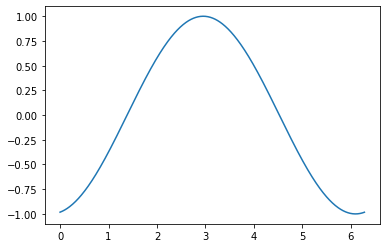

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 10))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=20, blit=True, save_count=50)

writer= animation.PillowWriter(fps=50)
ani.save("anim.gif", writer=writer)

#plt.show()

出来上がったアニメメーションGIFファイル
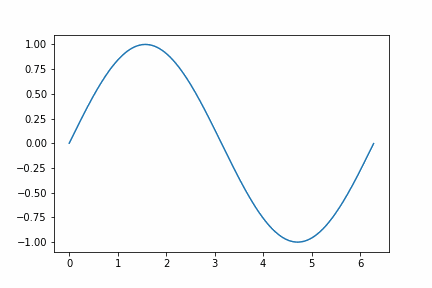

FuncAnimationはlineという変数を返す関数を引数にしてるがこのlineは[matplotliv.pyplot.plot()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot)の返り値をもとにしている。
plot()のリファランスによると、引数の関数は[matplotlib.lines.Line2D](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)クラスのインスタンスんのリストを返すもの(正確にはArtistクラスのインスタンスのリスト)とのこと。

どうやら以下の構文(,付き代入)は渡されたリストの要素のLine2Dクラスのインスタンスをlineに渡すようである。

``` python
line, = ax.plot(x, np.sin(x))
```


line2Dをもう少し調べてみる


In [7]:
line

In [8]:
#dir(line)

クラスは[matplotlib.lines.Line2D](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)でx,yのデータを持っている模様
[get_xdata()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.get_xdata),[get_ydata()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.get_xydata)を試してみる

In [9]:
x=line.get_xdata()
y=line.get_ydata()

In [10]:
type(x)

numpy.ndarray

In [11]:
x.ndim

1

In [12]:
x.shape

(629,)

In [13]:
type(y)

numpy.ndarray

In [14]:
y.ndim

1

In [15]:
y.shape

(629,)

xdata,ydataは629個の1次元ndarrayであることがわかった。(ある程度読めていただが、、)

### 磁場のプロット

2次元ベクトル場を表現するのに[pyplot.quiver()メソッド](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.quiver.html?highlight=pyplot%20quiver#matplotlib.pyplot.quiver)を使ってみる。

[numpy.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html?highlight=numpy%20meshgrid#numpy.meshgrid)を使って生成した配列を使うとスマートに記述できる。

In [16]:
n=10

x,y =np.meshgrid(np.linspace(-0.5,0.5,n),np.linspace(-0.5,0.5,n))

In [17]:
print(x)
print()
print(y)

[[-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]


In [18]:
I=2.0
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)
u=-I*np.sin(theta)/(2.0*np.pi*r)
v=I*np.cos(theta)/(2.0*np.pi*r)


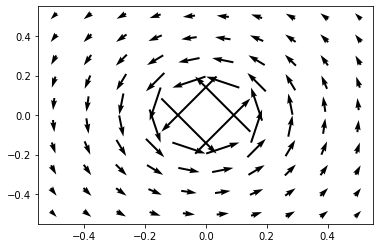

In [19]:
qv=plt.quiver(x,y,u,v,pivot='mid')

In [20]:
type(qv)

matplotlib.quiver.Quiver

プロットは[matplotlib.quiver.Quiverクラス](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.quiver.Quiver.html#matplotlib-quiver-quiver)として生成される模様

In [21]:
#dir(qv)

アニメーションにするためには先述のaxes.plot()を[axes.quiver()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.quiver.html?highlight=axes%20quiver#matplotlib.axes.Axes.quiver)にすればできそう。

FuncAnimation()で指定する関数は[matplotlib.artist.Artistクラス](https://matplotlib.org/3.2.1/apiの返り値となる関数である必要があるようでmatplotlib.quiver.Quiverクラスをそのままreturnしてもエラーになる。

調べるとmatplotlib.quiver.Quiverクラスは[matplotlib.collections.PolyCollectionクラス](https://matplotlib.org/3.2.1/api/collections_api.html#matplotlib.collections.PolyCollection)を継承しているようであり、その
[findobj()メソッド](https://matplotlib.org/3.2.1/api/collections_api.html#matplotlib.collections.PolyCollection.findobj)により、目的とするリストを得ることができた。

再描画するためには

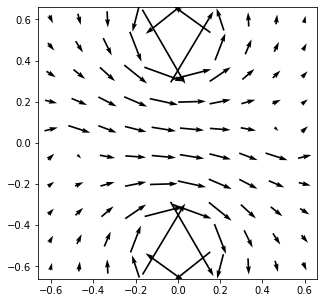

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

I=0.5 #電流振幅
n=10  #分解能

x,y =np.meshgrid(np.linspace(-0.6,0.6,n),np.linspace(-0.6,0.6,n))
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)


#a相pogitive 極座標変換 (0.0,0.5)
r_ap=np.sqrt((x-0.0)**2+(y-0.5)**2) 
theta_ap=np.arctan2((y-0.5),(x-0.0))

#a相negative 極座標変換 (0.0,-0.5)
r_an=np.sqrt((x-0.0)**2+(y+0.5)**2)
theta_an=np.arctan2((y+0.5),(x-0.0))

#b相pogitive 極座標変換 (-0.5,0.0)
r_bp=np.sqrt((x+0.5)**2+(y-0.0)**2)
theta_bp=np.arctan2((y+0.0),(x+0.5))

#b相negative 極座標変換 (0.5,0.0)
r_bn=np.sqrt((x-0.5)**2+(y-0.0)**2)
theta_bn=np.arctan2((y-0.0),(x-0.5))


fig, ax = plt.subplots(figsize=[5.0,5.0])

#quiverクラス生成
u=-I*np.sin(theta)/(2.0*np.pi*r)
v=I*np.cos(theta)/(2.0*np.pi*r)
qv=ax.quiver(x,y,u,v,pivot='mid')

#初期化関数
def init():  # only required for blitting to give a clean slate.
    Ia=I*np.cos(2.0*2.0*np.pi*0/100.0)
    Ib=I*np.sin(2.0*2.0*np.pi*0/100.0)
    
    u=-Ia*np.sin(theta_ap)/(2.0*np.pi*r_ap)+Ia*np.sin(theta_an)/(2.0*np.pi*r_an)-Ib*np.sin(theta_bp)/(2.0*np.pi*r_bp)+Ib*np.sin(theta_bn)/(2.0*np.pi*r_bn)
    v=Ia*np.cos(theta_ap)/(2.0*np.pi*r_ap)-Ia*np.cos(theta_an)/(2.0*np.pi*r_an)+Ib*np.cos(theta_bp)/(2.0*np.pi*r_bp)-Ib*np.cos(theta_bn)/(2.0*np.pi*r_bn)
    qv.set_UVC(u,v)
    return qv.findobj()

#アニメーション記述関数
def animate(i):
    Ia=I*np.cos(2.0*2.0*np.pi*i/100.0)
    Ib=I*np.sin(2.0*2.0*np.pi*i/100.0)
    
    u=-Ia*np.sin(theta_ap)/(2.0*np.pi*r_ap)+Ia*np.sin(theta_an)/(2.0*np.pi*r_an)-Ib*np.sin(theta_bp)/(2.0*np.pi*r_bp)+Ib*np.sin(theta_bn)/(2.0*np.pi*r_bn)
    v=Ia*np.cos(theta_ap)/(2.0*np.pi*r_ap)-Ia*np.cos(theta_an)/(2.0*np.pi*r_an)+Ib*np.cos(theta_bp)/(2.0*np.pi*r_bp)-Ib*np.cos(theta_bn)/(2.0*np.pi*r_bn)
    qv.set_UVC(u,v)
    return qv.findobj()

#FuncAnimationクラスの生成
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=20, blit=True, save_count=50)

#アニメーションの保存
writer = animation.PillowWriter(fps=50)
ani.save("pole0.gif", writer = writer)

#plt.show()

In [23]:
qv.findobj()

↑これを見るとfindobj()を返すかわりに

``` python
return　[qv]
```
としてもよかったかも、、、  (qv,でもいいみたいなのを後で知った)

とりあえず作成したアニメーション回転磁界のつもり

![pole0.gif](attachment:pole0.gif)

三相交流による回転磁界も

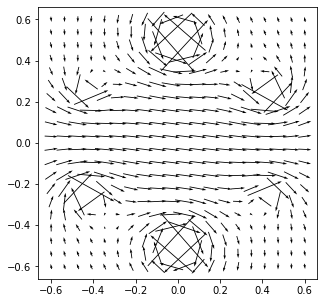

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

I=0.5 #電流振幅
f=1.0 #周波数
omega=2.0*np.pi*f #角周波数

n=20  #quiver分解能

x,y =np.meshgrid(np.linspace(-0.6,0.6,n),np.linspace(-0.6,0.6,n))
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)

rt3=np.sqrt(3.0)

#電線位置(positive)
ofset_ux=0.0
ofset_uy=0.5

ofset_vx=-0.25*rt3
ofset_vy=-0.25

ofset_wx=0.25*rt3
ofset_wy=-0.25


#u相pogitive 極座標変換 
r_up=np.sqrt((x-ofset_ux)**2+(y-ofset_uy)**2) 
theta_up=np.arctan2((y-ofset_uy),(x-ofset_ux))

#u相negative 極座標変換 
r_un=np.sqrt((x+ofset_ux)**2+(y+ofset_uy)**2) 
theta_un=np.arctan2((y+ofset_uy),(x+ofset_ux))


#v相pogitive 極座標変換
r_vp=np.sqrt((x-ofset_vx)**2+(y-ofset_vy)**2) 
theta_vp=np.arctan2((y-ofset_vy),(x-ofset_vx))

#v相negative 極座標変換 
r_vn=np.sqrt((x+ofset_vx)**2+(y+ofset_vy)**2) 
theta_vn=np.arctan2((y+ofset_vy),(x+ofset_vx))


#w相pogitive 極座標変換
r_wp=np.sqrt((x-ofset_wx)**2+(y-ofset_wy)**2) 
theta_wp=np.arctan2((y-ofset_wy),(x-ofset_wx))

#w相negative 極座標変換 
r_wn=np.sqrt((x+ofset_wx)**2+(y+ofset_wy)**2) 
theta_wn=np.arctan2((y+ofset_wy),(x+ofset_wx))


fig, ax = plt.subplots(figsize=[5.0,5.0])

#quiverクラス生成
u=-I*np.sin(theta)/(2.0*np.pi*r)
v=I*np.cos(theta)/(2.0*np.pi*r)
qv=ax.quiver(x,y,u,v,pivot='mid')

#初期化関数
def init():  # only required for blitting to give a clean slate.
    Iu=I*np.cos(0.0)
    Iv=I*np.cos(-(2.0/3.0)*np.pi)
    Iw=I*np.cos(-(4.0/3.0)*np.pi)
    
    u_u=-Iu*np.sin(theta_up)/(2.0*np.pi*r_up)+Iu*np.sin(theta_un)/(2.0*np.pi*r_un)
    v_u= Iu*np.cos(theta_up)/(2.0*np.pi*r_up)-Iu*np.cos(theta_un)/(2.0*np.pi*r_un)
    u_v=-Iv*np.sin(theta_vp)/(2.0*np.pi*r_vp)+Iv*np.sin(theta_vn)/(2.0*np.pi*r_vn)
    v_v= Iv*np.cos(theta_vp)/(2.0*np.pi*r_vp)-Iv*np.cos(theta_vn)/(2.0*np.pi*r_vn)
    u_w=-Iw*np.sin(theta_wp)/(2.0*np.pi*r_wp)+Iw*np.sin(theta_wn)/(2.0*np.pi*r_wn)
    v_w= Iw*np.cos(theta_wp)/(2.0*np.pi*r_wp)-Iw*np.cos(theta_wn)/(2.0*np.pi*r_wn)
     
    u=u_u+u_v+u_w
    v=v_u+v_v+v_w
    
    qv.set_UVC(u,v)
    return qv.findobj()

#アニメーション記述関数
def animate(i):
    Iu=I*np.cos(omega*i/50.0)
    Iv=I*np.cos(omega*i/50.0-(2.0/3.0)*np.pi)
    Iw=I*np.cos(omega*i/50.0-(4.0/3.0)*np.pi)
    
    u_u=-Iu*np.sin(theta_up)/(2.0*np.pi*r_up)+Iu*np.sin(theta_un)/(2.0*np.pi*r_un)
    v_u= Iu*np.cos(theta_up)/(2.0*np.pi*r_up)-Iu*np.cos(theta_un)/(2.0*np.pi*r_un)
    u_v=-Iv*np.sin(theta_vp)/(2.0*np.pi*r_vp)+Iv*np.sin(theta_vn)/(2.0*np.pi*r_vn)
    v_v= Iv*np.cos(theta_vp)/(2.0*np.pi*r_vp)-Iv*np.cos(theta_vn)/(2.0*np.pi*r_vn)
    u_w=-Iw*np.sin(theta_wp)/(2.0*np.pi*r_wp)+Iw*np.sin(theta_wn)/(2.0*np.pi*r_wn)
    v_w= Iw*np.cos(theta_wp)/(2.0*np.pi*r_wp)-Iw*np.cos(theta_wn)/(2.0*np.pi*r_wn)
        
    u=u_u+u_v+u_w
    v=v_u+v_v+v_w
      
    qv.set_UVC(u,v)
    return qv.findobj()


#FuncAnimationクラスの生成
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=20, blit=True, save_count=50)

#アニメーションの保存
writer = animation.PillowWriter(fps=50)
ani.save("pole1.gif", writer = writer)


#plt.show()

出来上がったアニメーション  
３相２極（機械角＝電気角）

![pole1.gif](attachment:pole1.gif)

もう少し飾り付けをするために[matplotlib.pyplot.scatter()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)を試してみる。

(-0.6, 0.6)

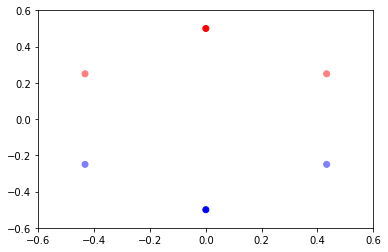

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

I=0.5 #電流振幅

rt3=np.sqrt(3.0)

#電線位置(positive)
ofset_ux=0.0
ofset_uy=0.5

ofset_vx=-0.25*rt3
ofset_vy=-0.25

ofset_wx=0.25*rt3
ofset_wy=-0.25

sx=np.array([ofset_ux,-ofset_ux,ofset_vx,-ofset_vx,ofset_wx,-ofset_wx])
sy=np.array([ofset_uy,-ofset_uy,ofset_vy,-ofset_vy,ofset_wy,-ofset_wy])

Iu=I*np.cos(0.0)
Iv=I*np.cos(-(2.0/3.0)*np.pi)
Iw=I*np.cos(-(4.0/3.0)*np.pi)

it=np.array([Iu,-Iu,Iv,-Iv,Iw,-Iw])

sc = plt.scatter(sx,sy,c=it,cmap="bwr",marker="o",vmin=-0.5,vmax=0.5)
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)


In [27]:
#dir(sc)

In [28]:
sc.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'array': masked_array(data=[ 0.5 , -0.5 , -0.25,  0.25, -0.25,  0.25],
              mask=False,
        fill_value=1e+20),
 'capstyle': None,
 'children': [],
 'clim': (-0.5, 0.5),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x305963a548>,
 'clip_on': True,
 'clip_path': None,
 'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x30562b8d48>,
 'contains': None,
 'edgecolor': array([[1.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 1.        , 1.        ],
        [0.50196078, 0.50196078, 1.        , 1.        ],
        [1.        , 0.50196078, 0.50196078, 1.        ],
        [0.49411765, 0.49411765, 1.        , 1.        ],
        [1.        , 0.49411765, 0.49411765, 1.        ]]),
 'facecolor': array([[1.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 1.        , 1.        ],
        [0.50196078, 0.50196078, 1.        , 1.        ],
        [1.  

In [29]:
sc.get_children()

[]

In [30]:
#dir(ax)

In [31]:
ax.get_children()

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

scatter()の返り値は[PathCollectionクラス](https://matplotlib.org/3.2.1/api/collections_api.html#matplotlib.collections.PathCollection)で描画要素の
[matplotlib.path.Pathクラス](https://matplotlib.org/3.2.1/api/path_api.html#matplotlib.path.Path)の集まりを表すクラス。

Pathクラスを設定して[PathCollection.set_Paths()メソッド](https://matplotlib.org/3.2.1/api/collections_api.html#matplotlib.collections.PathCollection.set_paths)で値をいじればよさそうだけど、、、

手前方向が正で赤がプラスで青がマイナス  
動画にするときには[Axes.scatter()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)をつかう。内容はほとんど一緒

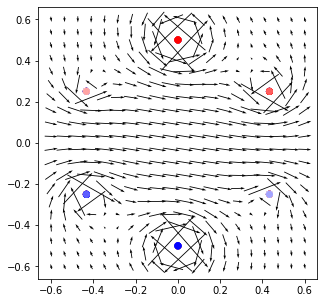

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

I=0.5 #電流振幅
f=0.5 #周波数
omega=2.0*np.pi*f #角周波数

n=20  #quiver分解能

x,y =np.meshgrid(np.linspace(-0.6,0.6,n),np.linspace(-0.6,0.6,n))
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)

rt3=np.sqrt(3.0)

#電線位置(positive)
ofset_ux=0.0
ofset_uy=0.5

ofset_vx=-0.25*rt3
ofset_vy=-0.25

ofset_wx=0.25*rt3
ofset_wy=-0.25


#u相pogitive 極座標変換 
r_up=np.sqrt((x-ofset_ux)**2+(y-ofset_uy)**2) 
theta_up=np.arctan2((y-ofset_uy),(x-ofset_ux))

#u相negative 極座標変換 
r_un=np.sqrt((x+ofset_ux)**2+(y+ofset_uy)**2) 
theta_un=np.arctan2((y+ofset_uy),(x+ofset_ux))


#v相pogitive 極座標変換
r_vp=np.sqrt((x-ofset_vx)**2+(y-ofset_vy)**2) 
theta_vp=np.arctan2((y-ofset_vy),(x-ofset_vx))

#v相negative 極座標変換 
r_vn=np.sqrt((x+ofset_vx)**2+(y+ofset_vy)**2) 
theta_vn=np.arctan2((y+ofset_vy),(x+ofset_vx))


#w相pogitive 極座標変換
r_vp=np.sqrt((x-ofset_vx)**2+(y-ofset_vy)**2) 
theta_vp=np.arctan2((y-ofset_vy),(x-ofset_vx))

#w相negative 極座標変換 
r_wn=np.sqrt((x+ofset_wx)**2+(y+ofset_wy)**2) 
theta_wn=np.arctan2((y+ofset_wy),(x+ofset_wx))

sx=np.array([ofset_ux,-ofset_ux,ofset_vx,-ofset_vx,ofset_wx,-ofset_wx])
sy=np.array([ofset_uy,-ofset_uy,ofset_vy,-ofset_vy,ofset_wy,-ofset_wy])


fig, ax = plt.subplots(figsize=[5.0,5.0])

#quiverクラス生成
u=-I*np.sin(theta)/(2.0*np.pi*r)
v=I*np.cos(theta)/(2.0*np.pi*r)
qv=ax.quiver(x,y,u,v,pivot='mid')


#初期化関数
def init():  # only required for blitting to give a clean slate.
    Iu=I*np.cos(0.0)
    Iv=I*np.cos(-(2.0/3.0)*np.pi)
    Iw=I*np.cos(-(4.0/3.0)*np.pi)
    
    u_u=-Iu*np.sin(theta_up)/(2.0*np.pi*r_up)+Iu*np.sin(theta_un)/(2.0*np.pi*r_un)
    v_u= Iu*np.cos(theta_up)/(2.0*np.pi*r_up)-Iu*np.cos(theta_un)/(2.0*np.pi*r_un)
    u_v=-Iv*np.sin(theta_vp)/(2.0*np.pi*r_vp)+Iv*np.sin(theta_vn)/(2.0*np.pi*r_vn)
    v_v= Iv*np.cos(theta_vp)/(2.0*np.pi*r_vp)-Iv*np.cos(theta_vn)/(2.0*np.pi*r_vn)
    u_w=-Iw*np.sin(theta_wp)/(2.0*np.pi*r_wp)+Iw*np.sin(theta_wn)/(2.0*np.pi*r_wn)
    v_w= Iw*np.cos(theta_wp)/(2.0*np.pi*r_wp)-Iw*np.cos(theta_wn)/(2.0*np.pi*r_wn)
     
    u=u_u+u_v+u_w
    v=v_u+v_v+v_w
    
    it=np.array([Iu,-Iu,Iv,-Iv,Iw,-Iw]) 
    sc=ax.scatter(sx,sy,c=it,cmap="bwr",marker="o",vmin=-0.5,vmax=0.5)
    
    qv.set_UVC(u,v)
    
    return qv,sc

#アニメーション記述関数
def animate(i):
    Iu=I*np.cos(omega*i/20.0)
    Iv=I*np.cos(omega*i/20.0-(2.0/3.0)*np.pi)
    Iw=I*np.cos(omega*i/20.0-(4.0/3.0)*np.pi)
    
    u_u=-Iu*np.sin(theta_up)/(2.0*np.pi*r_up)+Iu*np.sin(theta_un)/(2.0*np.pi*r_un)
    v_u= Iu*np.cos(theta_up)/(2.0*np.pi*r_up)-Iu*np.cos(theta_un)/(2.0*np.pi*r_un)
    u_v=-Iv*np.sin(theta_vp)/(2.0*np.pi*r_vp)+Iv*np.sin(theta_vn)/(2.0*np.pi*r_vn)
    v_v= Iv*np.cos(theta_vp)/(2.0*np.pi*r_vp)-Iv*np.cos(theta_vn)/(2.0*np.pi*r_vn)
    u_w=-Iw*np.sin(theta_wp)/(2.0*np.pi*r_wp)+Iw*np.sin(theta_wn)/(2.0*np.pi*r_wn)
    v_w= Iw*np.cos(theta_wp)/(2.0*np.pi*r_wp)-Iw*np.cos(theta_wn)/(2.0*np.pi*r_wn)
        
    u=u_u+u_v+u_w
    v=v_u+v_v+v_w
     
    it=np.array([Iu,-Iu,Iv,-Iv,Iw,-Iw]) 
    sc=ax.scatter(sx,sy,c=it,cmap="bwr",marker="o",vmin=-0.5,vmax=0.5)
         
    qv.set_UVC(u,v)
    return qv,sc


#FuncAnimationクラスの生成
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=50, blit=True, save_count=40)

#アニメーションの保存
writer = animation.PillowWriter(fps=20)
ani.save("pole2.gif", writer = writer)



作成したアニメーション  
赤が手前向き、青が奥向きの電流

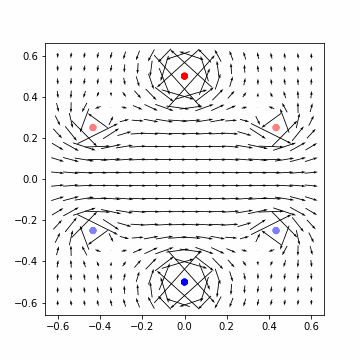

3相4極巻き線もやってみる。

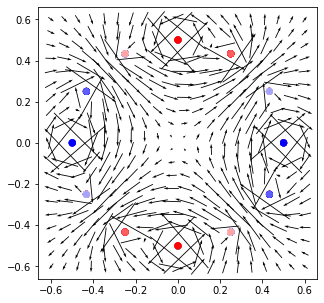

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

I=0.5 #電流振幅
f=0.5 #周波数
omega=2.0*np.pi*f #角周波数

n=20  #quiver分解能

x,y =np.meshgrid(np.linspace(-0.6,0.6,n),np.linspace(-0.6,0.6,n))
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)

rt3=np.sqrt(3.0)

#電線位置(positive) 

ofset_u1px=0.0
ofset_u1py=0.5

ofset_u1nx=-0.5*np.sin(3.0*np.pi/6.0)
ofset_u1ny= 0.5*np.cos(3.0*np.pi/6.0)


ofset_v1px=-0.5*np.sin(2.0*np.pi/6.0)
ofset_v1py= 0.5*np.cos(2.0*np.pi/6.0)

ofset_v1nx=-0.5*np.sin(5.0*np.pi/6.0)
ofset_v1ny= 0.5*np.cos(5.0*np.pi/6.0)


ofset_w1px=-0.5*np.sin(4.0*np.pi/6.0)
ofset_w1py= 0.5*np.cos(4.0*np.pi/6.0)

ofset_w1nx=-0.5*np.sin(1.0*np.pi/6.0)
ofset_w1ny= 0.5*np.cos(1.0*np.pi/6.0)


#u1相pogitive 極座標変換 
r_u1p=np.sqrt((x-ofset_u1px)**2+(y-ofset_u1py)**2) 
theta_u1p=np.arctan2((y-ofset_u1py),(x-ofset_u1px))

#u2相pogitive 極座標変換 
r_u2p=np.sqrt((x+ofset_u1px)**2+(y+ofset_u1py)**2) 
theta_u2p=np.arctan2((y+ofset_u1py),(x+ofset_u1px))


#u1相negative 極座標変換 
r_u1n=np.sqrt((x-ofset_u1nx)**2+(y-ofset_u1ny)**2) 
theta_u1n=np.arctan2((y-ofset_u1ny),(x-ofset_u1nx))

#u2相negative 極座標変換 
r_u2n=np.sqrt((x+ofset_u1nx)**2+(y+ofset_u1ny)**2) 
theta_u2n=np.arctan2((y+ofset_u1ny),(x+ofset_u1nx))


#v1相pogitive 極座標変換
r_v1p=np.sqrt((x-ofset_v1px)**2+(y-ofset_v1py)**2) 
theta_v1p=np.arctan2((y-ofset_v1py),(x-ofset_v1px))

#v2相pogitive 極座標変換 
r_v2p=np.sqrt((x+ofset_v1px)**2+(y+ofset_v1py)**2) 
theta_v2p=np.arctan2((y+ofset_v1py),(x+ofset_v1px))

#v1相negative 極座標変換
r_v1n=np.sqrt((x-ofset_v1nx)**2+(y-ofset_v1ny)**2) 
theta_v1n=np.arctan2((y-ofset_v1ny),(x-ofset_v1nx))

#v2相negative 極座標変換 
r_v2n=np.sqrt((x+ofset_v1nx)**2+(y+ofset_v1ny)**2) 
theta_v2n=np.arctan2((y+ofset_v1ny),(x+ofset_v1nx))

#w1相pogitive 極座標変換
r_w1p=np.sqrt((x-ofset_w1px)**2+(y-ofset_w1py)**2) 
theta_w1p=np.arctan2((y-ofset_w1py),(x-ofset_w1px))

#w2相pogitive 極座標変換 
r_w2p=np.sqrt((x+ofset_w1px)**2+(y+ofset_w1py)**2) 
theta_w2p=np.arctan2((y+ofset_w1py),(x+ofset_w1px))

#w1相negative  極座標変換
r_w1n=np.sqrt((x-ofset_w1nx)**2+(y-ofset_w1ny)**2) 
theta_w1n=np.arctan2((y-ofset_w1ny),(x-ofset_w1nx))

#w2相negative  極座標変換 
r_w2n=np.sqrt((x+ofset_w1nx)**2+(y+ofset_w1ny)**2) 
theta_w2n=np.arctan2((y+ofset_w1ny),(x+ofset_w1nx))

sx=np.array([ofset_u1px,-ofset_u1px,ofset_u1nx,-ofset_u1nx,ofset_v1px,-ofset_v1px,ofset_v1nx,-ofset_v1nx,ofset_w1px,-ofset_w1px,ofset_w1nx,-ofset_w1nx])
sy=np.array([ofset_u1py,-ofset_u1py,ofset_u1ny,-ofset_u1ny,ofset_v1py,-ofset_v1py,ofset_v1ny,-ofset_v1ny,ofset_w1py,-ofset_w1py,ofset_w1ny,-ofset_w1ny])


fig, ax = plt.subplots(figsize=[5.0,5.0])

#quiverクラス生成
u=-I*np.sin(theta)/(2.0*np.pi*r)
v=I*np.cos(theta)/(2.0*np.pi*r)
qv=ax.quiver(x,y,u,v,pivot='mid')


#初期化関数
def init():  # only required for blitting to give a clean slate.
    Iu=I*np.cos(0.0)
    Iv=I*np.cos(-(2.0/3.0)*np.pi)
    Iw=I*np.cos(-(4.0/3.0)*np.pi)
    
    u_u1=-Iu*np.sin(theta_u1p)/(2.0*np.pi*r_u1p)+Iu*np.sin(theta_u1n)/(2.0*np.pi*r_u1n)
    v_u1= Iu*np.cos(theta_u1p)/(2.0*np.pi*r_u1p)-Iu*np.cos(theta_u1n)/(2.0*np.pi*r_u1n)
    u_v1=-Iv*np.sin(theta_v1p)/(2.0*np.pi*r_v1p)+Iv*np.sin(theta_v1n)/(2.0*np.pi*r_v1n)
    v_v1= Iv*np.cos(theta_v1p)/(2.0*np.pi*r_v1p)-Iv*np.cos(theta_v1n)/(2.0*np.pi*r_v1n)
    u_w1=-Iw*np.sin(theta_w1p)/(2.0*np.pi*r_w1p)+Iw*np.sin(theta_w1n)/(2.0*np.pi*r_w1n)
    v_w1= Iw*np.cos(theta_w1p)/(2.0*np.pi*r_w1p)-Iw*np.cos(theta_w1n)/(2.0*np.pi*r_w1n)
    
    u_u2=-Iu*np.sin(theta_u2p)/(2.0*np.pi*r_u2p)+Iu*np.sin(theta_u2n)/(2.0*np.pi*r_u2n)
    v_u2= Iu*np.cos(theta_u2p)/(2.0*np.pi*r_u2p)-Iu*np.cos(theta_u2n)/(2.0*np.pi*r_u2n)
    u_v2=-Iv*np.sin(theta_v2p)/(2.0*np.pi*r_v2p)+Iv*np.sin(theta_v2n)/(2.0*np.pi*r_v2n)
    v_v2= Iv*np.cos(theta_v2p)/(2.0*np.pi*r_v2p)-Iv*np.cos(theta_v2n)/(2.0*np.pi*r_v2n)
    u_w2=-Iw*np.sin(theta_w2p)/(2.0*np.pi*r_w2p)+Iw*np.sin(theta_w2n)/(2.0*np.pi*r_w2n)
    v_w2= Iw*np.cos(theta_w2p)/(2.0*np.pi*r_w2p)-Iw*np.cos(theta_w2n)/(2.0*np.pi*r_w2n)
    
    
    u=u_u1+u_v1+u_w1+u_u2+u_v2+u_w2
    v=v_u1+v_v1+v_w1+v_u2+v_v2+v_w2
    
    it=np.array([Iu,Iu,-Iu,-Iu,Iv,Iv,-Iv,-Iv,Iw,Iw,-Iw,-Iw]) 
    sc=ax.scatter(sx,sy,c=it,cmap="bwr",marker="o",vmin=-0.5,vmax=0.5)
    
    qv.set_UVC(u,v)
    
    return qv,sc

#アニメーション記述関数
def animate(i):
    Iu=I*np.cos(omega*i/20.0)
    Iv=I*np.cos(omega*i/20.0-(2.0/3.0)*np.pi)
    Iw=I*np.cos(omega*i/20.0-(4.0/3.0)*np.pi)
    
    u_u1=-Iu*np.sin(theta_u1p)/(2.0*np.pi*r_u1p)+Iu*np.sin(theta_u1n)/(2.0*np.pi*r_u1n)
    v_u1= Iu*np.cos(theta_u1p)/(2.0*np.pi*r_u1p)-Iu*np.cos(theta_u1n)/(2.0*np.pi*r_u1n)
    u_v1=-Iv*np.sin(theta_v1p)/(2.0*np.pi*r_v1p)+Iv*np.sin(theta_v1n)/(2.0*np.pi*r_v1n)
    v_v1= Iv*np.cos(theta_v1p)/(2.0*np.pi*r_v1p)-Iv*np.cos(theta_v1n)/(2.0*np.pi*r_v1n)
    u_w1=-Iw*np.sin(theta_w1p)/(2.0*np.pi*r_w1p)+Iw*np.sin(theta_w1n)/(2.0*np.pi*r_w1n)
    v_w1= Iw*np.cos(theta_w1p)/(2.0*np.pi*r_w1p)-Iw*np.cos(theta_w1n)/(2.0*np.pi*r_w1n)
    
    u_u2=-Iu*np.sin(theta_u2p)/(2.0*np.pi*r_u2p)+Iu*np.sin(theta_u2n)/(2.0*np.pi*r_u2n)
    v_u2= Iu*np.cos(theta_u2p)/(2.0*np.pi*r_u2p)-Iu*np.cos(theta_u2n)/(2.0*np.pi*r_u2n)
    u_v2=-Iv*np.sin(theta_v2p)/(2.0*np.pi*r_v2p)+Iv*np.sin(theta_v2n)/(2.0*np.pi*r_v2n)
    v_v2= Iv*np.cos(theta_v2p)/(2.0*np.pi*r_v2p)-Iv*np.cos(theta_v2n)/(2.0*np.pi*r_v2n)
    u_w2=-Iw*np.sin(theta_w2p)/(2.0*np.pi*r_w2p)+Iw*np.sin(theta_w2n)/(2.0*np.pi*r_w2n)
    v_w2= Iw*np.cos(theta_w2p)/(2.0*np.pi*r_w2p)-Iw*np.cos(theta_w2n)/(2.0*np.pi*r_w2n)
    
    
    u=u_u1+u_v1+u_w1+u_u2+u_v2+u_w2
    v=v_u1+v_v1+v_w1+v_u2+v_v2+v_w2
     
    it=np.array([Iu,Iu,-Iu,-Iu,Iv,Iv,-Iv,-Iv,Iw,Iw,-Iw,-Iw]) 
    sc=ax.scatter(sx,sy,c=it,cmap="bwr",marker="o",vmin=-0.5,vmax=0.5)
         
    qv.set_UVC(u,v)
    return qv,sc


#FuncAnimationクラスの生成
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=50, blit=True, save_count=40)

#アニメーションの保存
writer = animation.PillowWriter(fps=20)
ani.save("pole3.gif", writer = writer)


かなり力技書いたので、ちょっとスマートじゃないコードになってしまったけど、、作成したアニメーションはこちら、、  
4極以上になるつまり、機械角が電気角の2倍以上になると空間上の分布は磁界がイメージとしてはすこし捉えにくい、、  

むしろ巻き線電流の電流分布が回転してると捉えたほうが分かりやすいかも

p極巻き線の場合巻き線している円上にそった角度θに対する電流分布の形状は$I(\theta)=I\sin(p\theta/2)$の形状に近似されていてそれが回転数2f/pで回転している(fは周波数)。ラジアル方向の磁界の強さは$dI(\theta)/d\theta$に比例する。

つまりなんとなく、電流の流れてないところで磁界が出入りしている状態が回転している、、




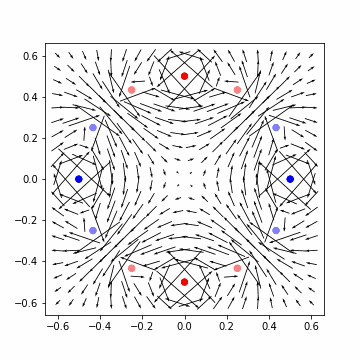


これ以上の極数でやるのは上のコーディングの仕方ではしんどい、、、というかmatplotlibの学習が目的なので守備範囲外、、

とまあ極数の話はここまでで、、、2相2極に戻って今度はもう少しグラフの飾り付けを工夫してみる。  
先ほどから使っている[Axes.scatter()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)のマーカースタイルを[matplotlib.markers.MarkerStyleクラス](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle)を使って色々試してみる。

今度はscatter()で描いたプロットを動かす(回転子巻線の回転)のにも挑戦。  
位置を変えると履歴が残るので、、、都度axex.clear()して再描画しなければいけなくなった、、、もっと他にいい方法があるかも、、


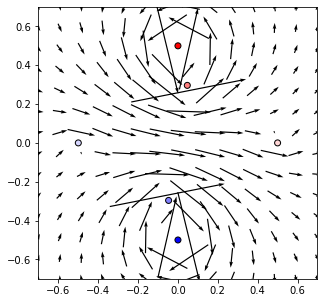

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

##電気機器(回転器)

Is = 0.4 #固定子巻線電流(振幅)
Ir = 0.2 #回転子巻線電流(同期機の場合は直流、誘導機の場合は振幅)

r_stator = 0.5 #固定子巻線半径
r_rotor  = 0.3  #回転子巻線半径

delta = (0./180.)*np.pi #トルク角δ[rad](誘導器の場合δ=180°)

#固定子巻線電流周波数
fs=0.5  #[Hz]
omega_fs=2.0*np.pi*fs #[rad/s]

ss=0.0 #滑り(同期器はss=0)


#回転子回転周波数
fr=(1-ss)*fs  #[Hz]         
omega_fr=2.0*np.pi*fr #[rad/s]

#回転子巻線電流周波数
fri=ss*fs  #[Hz]     
omega_fri=2.0*np.pi*fri  #[rad/s]

#quiver設定
plot_width=1.4 #quiverプロットサイズ
n=14  #quiver分解能

#animation設定
t_interval=50 #フレーム間隔[ms]
t_d=t_interval/1000.0
num_flames=40 #フレーム数
filename_out="rotation_machine_1.gif"#出力ファイル名

x,y =np.meshgrid(np.linspace(-plot_width/2.0,plot_width/2.0,n),np.linspace(-plot_width/2.0,plot_width/2.0,n))
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)

stator_pos_x_list=[]
stator_pos_y_list=[]

#a相pogitive 極座標変換 
phi_ap=(90.0/180.0)*np.pi
rcos_phi=r_stator*np.cos(phi_ap)
rsin_phi=r_stator*np.sin(phi_ap)
r_ap=np.sqrt((x-rcos_phi)**2+(y-rsin_phi)**2) 
theta_ap=np.arctan2((y-rsin_phi),(x-rcos_phi))
stator_pos_x_list+=[rcos_phi]
stator_pos_y_list+=[rsin_phi]


#a相negative 極座標変換
phi_an=(-90.0/180.0)*np.pi
rcos_phi=r_stator*np.cos(phi_an)
rsin_phi=r_stator*np.sin(phi_an)
r_an=np.sqrt((x-rcos_phi)**2+(y-rsin_phi)**2) 
theta_an=np.arctan2((y-rsin_phi),(x-rcos_phi))
stator_pos_x_list+=[rcos_phi]
stator_pos_y_list+=[rsin_phi]

#b相pogitive 極座標変換 
phi_bp=(-180.0/180.0)*np.pi
rcos_phi=r_stator*np.cos(phi_bp)
rsin_phi=r_stator*np.sin(phi_bp)
r_bp=np.sqrt((x-rcos_phi)**2+(y-rsin_phi)**2) 
theta_bp=np.arctan2((y-rsin_phi),(x-rcos_phi))
stator_pos_x_list+=[rcos_phi]
stator_pos_y_list+=[rsin_phi]

#b相negative 極座標変換
phi_bn=(0.0/180.0)*np.pi
rcos_phi=r_stator*np.cos(phi_bn)
rsin_phi=r_stator*np.sin(phi_bn)
r_bn=np.sqrt((x-rcos_phi)**2+(y-rsin_phi)**2) 
theta_bn=np.arctan2((y-rsin_phi),(x-rcos_phi))
stator_pos_x_list+=[rcos_phi]
stator_pos_y_list+=[rsin_phi]

fig, ax = plt.subplots(figsize=[5.0,5.0])

#quiverクラス生成
u=-Is*np.sin(theta)/(2.0*np.pi*r)
v=Is*np.cos(theta)/(2.0*np.pi*r)
qv=ax.quiver(x,y,u,v,pivot='mid')


#初期化関数
def init():  # only required for blitting to give a clean slate.
   
    ###  a相磁界計算(回転磁界)
    Ia=Is*np.cos(delta)
    u_a=-Ia*np.sin(theta_ap)/(2.0*np.pi*r_ap)+Ia*np.sin(theta_an)/(2.0*np.pi*r_an) #x方向成分u
    v_a=+Ia*np.cos(theta_ap)/(2.0*np.pi*r_ap)-Ia*np.cos(theta_an)/(2.0*np.pi*r_an) #y方向成分v
    

    ###  b相磁界計算(回転磁界)
    Ib=Is*np.sin(delta)    
    u_b=-Ib*np.sin(theta_bp)/(2.0*np.pi*r_bp)+Ib*np.sin(theta_bn)/(2.0*np.pi*r_bn) #x方向成分u
    v_b=+Ib*np.cos(theta_bp)/(2.0*np.pi*r_bp)-Ib*np.cos(theta_bn)/(2.0*np.pi*r_bn) #y方向成分v
    

    ####### 回転子磁界計算(巻線回転)
    rotor_pos_x_list=[]
    rotor_pos_y_list=[]   
    
    Irt=Ir*np.cos(0)
    
    #回転子pogitive 極座標変換 
    phi_rp=(90.0/180.0)*np.pi
    rcos_phi=r_rotor*np.cos(phi_rp)
    rsin_phi=r_rotor*np.sin(phi_rp)
    r_rp=np.sqrt((x-rcos_phi)**2+(y-rsin_phi)**2) 
    theta_rp=np.arctan2((y-rsin_phi),(x-rcos_phi))
    rotor_pos_x_list+=[rcos_phi]
    rotor_pos_y_list+=[rsin_phi] 
    
    #回転子negative 極座標変換
    phi_rn=(-90/180.0)*np.pi
    rcos_phi=r_rotor*np.cos(phi_rn)
    rsin_phi=r_rotor*np.sin(phi_rn)
    r_rn=np.sqrt((x-rcos_phi)**2+(y-rsin_phi)**2) 
    theta_rn=np.arctan2((y-rsin_phi),(x-rcos_phi))
    rotor_pos_x_list+=[rcos_phi]
    rotor_pos_y_list+=[rsin_phi] 
    
    u_r=-Irt*np.sin(theta_rp)/(2.0*np.pi*r_rp)+Irt*np.sin(theta_rn)/(2.0*np.pi*r_rn) #x方向成分u
    v_r=+Irt*np.cos(theta_rp)/(2.0*np.pi*r_rp)-Irt*np.cos(theta_rn)/(2.0*np.pi*r_rn) #y方向成分v
      
    #u,v合成
    u=u_a+u_b+u_r
    v=v_a+v_b+v_r
    
    #axes クリア
    ax.clear()
    
    ax.set_xlim(-plot_width/2.0,plot_width/2.0)  
    ax.set_ylim(-plot_width/2.0,plot_width/2.0)      
    
    #quiver反映
    qv.set_UVC(u,v)
    ax.add_artist(qv)   
    
    #scatter用データ作成(電線位置及び電流値)
    sx=np.array(stator_pos_x_list+rotor_pos_x_list)#電線位置x
    sy=np.array(stator_pos_y_list+rotor_pos_y_list)#電線位置y
    it=np.array([Ia,-Ia,Ib,-Ib,Irt,-Irt])            #電流値
    
    #scatterプロット
    sc=ax.scatter(sx,sy,c=it,cmap="bwr",marker="o",vmin=-max([Is,Ir]),vmax=max([Is,Ir]))    
    
    return qv,sc

#アニメーション記述関数
def animate(i):
 
    ###  a相磁界計算(回転磁界)
    Ia=Is*np.cos(omega_fs*t_d*i+delta)
    u_a=-Ia*np.sin(theta_ap)/(2.0*np.pi*r_ap)+Ia*np.sin(theta_an)/(2.0*np.pi*r_an) #x方向成分u
    v_a=+Ia*np.cos(theta_ap)/(2.0*np.pi*r_ap)-Ia*np.cos(theta_an)/(2.0*np.pi*r_an) #y方向成分v
    

    ###  b相磁界計算(回転磁界)
    Ib=Is*np.sin(omega_fs*t_d*i+delta) 
    u_b=-Ib*np.sin(theta_bp)/(2.0*np.pi*r_bp)+Ib*np.sin(theta_bn)/(2.0*np.pi*r_bn) #x方向成分u
    v_b=+Ib*np.cos(theta_bp)/(2.0*np.pi*r_bp)-Ib*np.cos(theta_bn)/(2.0*np.pi*r_bn) #y方向成分v
    

    ####### 回転子磁界計算(巻線回転)
    rotor_pos_x_list=[]
    rotor_pos_y_list=[]   

    Irt=Ir*np.cos(omega_fri*t_d*i)
    
    #回転子pogitive 極座標変換 
    phi_rp=(90.0/180.0)*np.pi+omega_fr*t_d*i
    rcos_phi=r_rotor*np.cos(phi_rp)
    rsin_phi=r_rotor*np.sin(phi_rp)
    r_rp=np.sqrt((x-rcos_phi)**2+(y-rsin_phi)**2) 
    theta_rp=np.arctan2((y-rsin_phi),(x-rcos_phi))
    rotor_pos_x_list+=[rcos_phi]
    rotor_pos_y_list+=[rsin_phi] 
    
    
    #回転子negative 極座標変換
    phi_rn=(-90.0/180.0)*np.pi+omega_fr*t_d*i
    rcos_phi=r_rotor*np.cos(phi_rn)
    rsin_phi=r_rotor*np.sin(phi_rn)
    r_rn=np.sqrt((x-rcos_phi)**2+(y-rsin_phi)**2) 
    theta_rn=np.arctan2((y-rsin_phi),(x-rcos_phi))
    rotor_pos_x_list+=[rcos_phi]
    rotor_pos_y_list+=[rsin_phi]
    
    u_r=-Irt*np.sin(theta_rp)/(2.0*np.pi*r_rp)+Irt*np.sin(theta_rn)/(2.0*np.pi*r_rn) #x方向成分u
    v_r=+Irt*np.cos(theta_rp)/(2.0*np.pi*r_rp)-Irt*np.cos(theta_rn)/(2.0*np.pi*r_rn) #y方向成分v
      
    #u,v合成
    u=u_a+u_b+u_r
    v=v_a+v_b+v_r

    #axes クリア
    ax.clear()
    ax.set_xlim(-plot_width/2.0,plot_width/2.0)  
    ax.set_ylim(-plot_width/2.0,plot_width/2.0)      
    
    #quiver反映
    qv.set_UVC(u,v)
    ax.add_artist(qv)
    
    #scatter用データ作成(電線位置及び電流値)
    sx=np.array(stator_pos_x_list+rotor_pos_x_list)#電線位置x
    sy=np.array(stator_pos_y_list+rotor_pos_y_list)#電線位置y
    it=np.array([Ia,-Ia,Ib,-Ib,Irt,-Irt])            #電流値
    
    #print(len(sx),len(sy),len(it))
    
    #scatterプロット
    sc=ax.scatter(sx,sy,c=it,cmap="bwr",marker="o",vmin=-max([Is,Ir]),vmax=max([Is,Ir]),edgecolor="Black")    
   
    return qv,sc

#FuncAnimationクラスの生成
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=t_interval, blit=True, save_count=num_flames)

#アニメーションの保存
writer = animation.PillowWriter(fps=1000/t_interval)
ani.save(filename_out,  writer = writer)

#plt.show()

出力したファイル

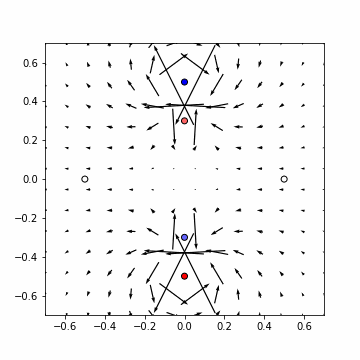

